In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
def clean_df(df):
    df = df.fillna(-1)
    df = df.replace(r'[^0-9]+',-1)
    df = df.replace('',-1)
    df = df.replace(' ',-1)
    df = df.replace('\n',-1)
    return df

In [23]:
data = pd.read_csv("results.csv", delim_whitespace=True) 
data = clean_df(data)

# data = data.drop([0])

data["Clock"] = pd.to_numeric(data["Clock"],errors='coerce')
data["BrMisAll"] = pd.to_numeric(data["BrMisAll"],errors='coerce')
data["BrIndir"] = pd.to_numeric(data["BrIndir"],errors='coerce')
data["BrMispInd"] = pd.to_numeric(data["BrMispInd"],errors='coerce')
data["BrClear"] = pd.to_numeric(data["BrClear"],errors='coerce')


num_rows = len(data)
same_pc_bits = pd.Series([(i // 20) for i in range(num_rows)])
data["SamePCLowerBits"] = same_pc_bits


for i in range(num_rows // 20):
    data = data.drop(20*i)
# data["Dec-uops"] = pd.to_numeric(data["Dec-uops"],errors='coerce')
# data["DSB-uops"] = pd.to_numeric(data["DSB-uops"],errors='coerce')
# data["LSD-uops"] = pd.to_numeric(data["LSD-uops"],errors='coerce')
# data["Dec-uops"] = (data["Dec-uops"]) / (data["DSB-uops"])
# data["LSD-uops"] = (data["LSD-uops"]) / (data["DSB-uops"])
# data["DSB-uops"] = (data["DSB-uops"]) / (data["BrRetired"])


#data["BrRetired"] = (data["BrRetired"]) // 1000
#data["ICacheMiss"] = (data["ICacheMiss"]) / (data["BrRetired"]*1000)
#data["Clock"] = (data["Clock"]) / (data["BrRetired"]*1000)
data["BrMispInd_Rate"] = data["BrMispInd"] / data["BrIndir"]

# mode_value = data['BrRetired'].mode()[0]
# data['BrRetired'] = data['BrRetired'].apply(lambda x: mode_value if x != mode_value else x)

In [24]:
data

,Clock,BrMisAll,BrIndir,BrMispInd,BrClear,SamePCLowerBits,BrMispInd_Rate
1,18736691,7855,4000,0,1,0,0.00000
2,18741171,5970,4000,1,620,0,0.00025
3,18830140,3272,4000,0,108,0,0.00000
4,18661548,3121,4000,0,0,0,0.00000
5,18659016,3069,4000,0,0,0,0.00000
...,...,...,...,...,...,...,...
395,18691185,2962,4000,2933,0,19,0.73325
396,18684382,3021,4000,3000,0,19,0.75000
397,18695295,3023,4000,3001,0,19,0.75025
398,18699790,3030,4000,3000,276,19,0.75000


[(0.0, 1.1)]

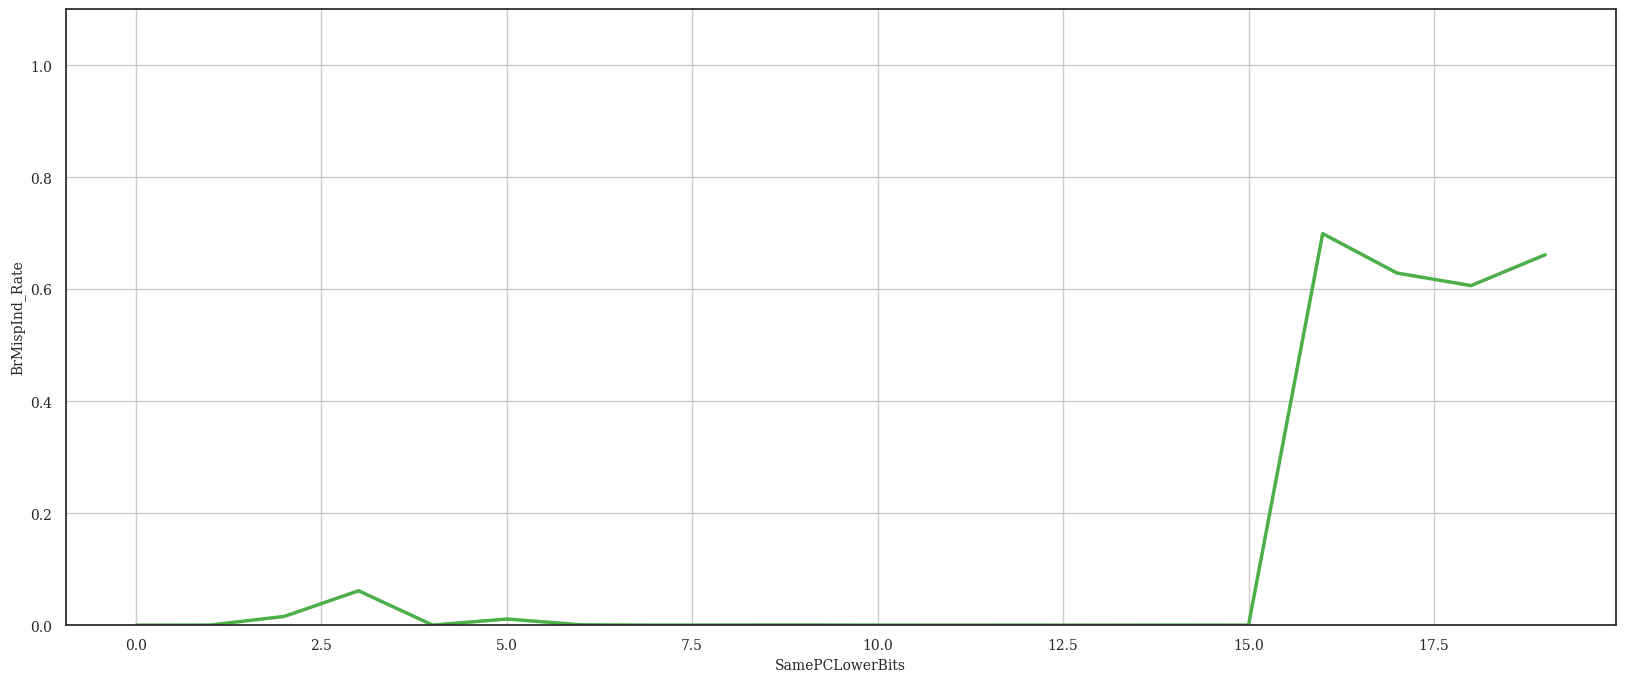

In [25]:

def set_style():
    plt.rcParams["font.family"] = "serif"
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42
    sns.set(rc={'figure.figsize':(20,8),"font.size":10, "font.family": "serif", 
                "axes.titlesize":10,"axes.labelsize": 10, "ytick.labelsize":10, 
                 "xtick.labelsize":10 , 'legend.fontsize':10, 'legend.title_fontsize': 10}, style="white")

set_style()

p = sns.lineplot(data=data, x="SamePCLowerBits", y="BrMispInd_Rate", marker="o", color=sns.color_palette("Set1")[2], linewidth=2.5, markersize = 0, errorbar=None)
p.grid()
# p.set_xscale('log', base=2)
# p.set(xlim=(0,9))
p.set(ylim=(-0.1,1.1))

# Saving the Seaborn Figure:
# plt.savefig('res.pdf', bbox_inches='tight')